<a href="https://colab.research.google.com/github/Arch0/EDA-Airbnb-Capstone/blob/main/Indivisual_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
%matplotlib inline

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df = pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')

FileNotFoundError: ignored

In [ ]:
df.head()

NameError: ignored

In [ ]:
df.shape

(48895, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# 1 - Data Cleaning


In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
(df.isnull().sum() * 100) /len(df)

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [ ]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [ ]:
df[df['price'] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaT,NaN,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


In [ ]:
# Dropping the rows where price = 0

temp_rows = df.index[df['price'] == 0].tolist()

In [ ]:
df.drop(temp_rows, inplace=True)

In [ ]:
df.shape

(48884, 16)

Checking for outliers in numerical column like price, minimum_nights, number_of_reviews

In [ ]:
df["price"].value_counts()

100     2051
150     2047
50      1534
60      1458
200     1401
        ... 
2010       1
1485       1
822        1
539        1
1880       1
Name: price, Length: 673, dtype: int64

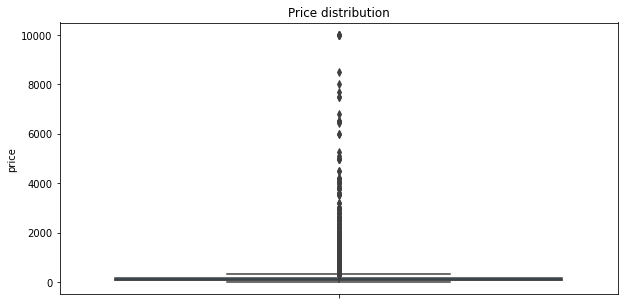

In [ ]:
plt.figure(figsize=(10,5))
vio_plt=sns.boxplot(data=df, y='price')
vio_plt.set_title('Price distribution')
plt.show()

There is outliers in price, we have to remove this
1. randomly removing upper price range
2. or using Quartile range (First quartile: the lowest 25% of numbers
Second quartile: between 25.1% and 50% (up to the median)
Third quartile: 50.1% to 75% (above the median)
Fourth quartile: the highest 25% of numbers)
3. or interquartile range (middle 50% =Q3-Q1)

In [ ]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 
 return lower_range,upper_range

In [ ]:
lower_bound,upper_bound = outlier_treatment(df['price'])

In [ ]:
df1 = df[(df.price>lower_bound) & (df.price<upper_bound)]

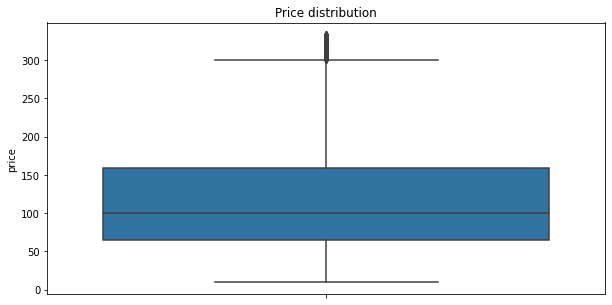

In [ ]:
plt.figure(figsize=(10,5))
vio_plt=sns.boxplot(data=df1, y='price')
vio_plt.set_title('Price distribution')
plt.show()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45907 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              45907 non-null  int64         
 1   name                            45892 non-null  object        
 2   host_id                         45907 non-null  int64         
 3   host_name                       45886 non-null  object        
 4   neighbourhood_group             45907 non-null  object        
 5   neighbourhood                   45907 non-null  object        
 6   latitude                        45907 non-null  float64       
 7   longitude                       45907 non-null  float64       
 8   room_type                       45907 non-null  object        
 9   price                           45907 non-null  int64         
 10  minimum_nights                  45907 non-null  int64         
 11  nu

In [ ]:
#checking for any duplicate values in the dataset
df.duplicated().sum()

0

In [ ]:
df.drop(['id','last_review'],axis = 1, inplace = True)

# 2 - (Exploratory Data Analysis) EDA Start...


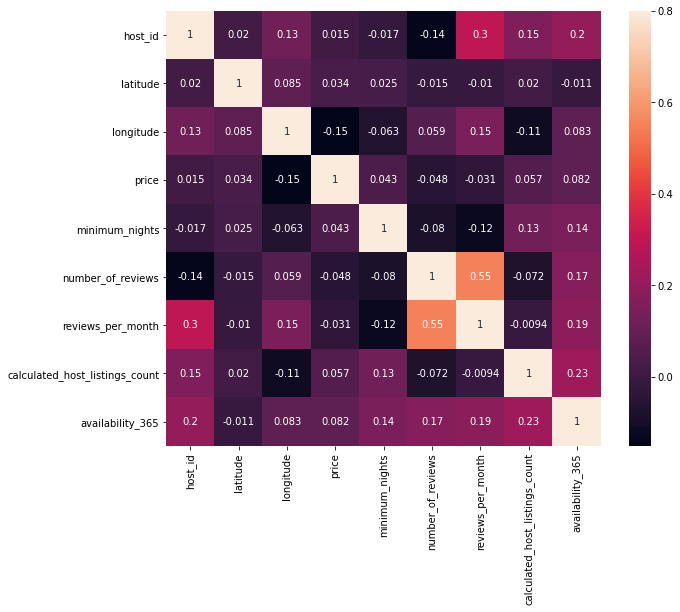

In [ ]:
#correlation matrix (to check relation between features)
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

Heatmap is giving clear correlation between different features that can affect a airbnb listing.





In [ ]:
#top 5 listings on Airbnb in entire NYC:

listings_count_df=df['name'].value_counts()[:5].reset_index()
listings_count_df.rename(columns={'index':'Listings on Airbnb','name':'Total_listings'},inplace=True)
listings_count_df


,Listings on Airbnb,Total_listings
0,Hillside Hotel,18
1,Home away from home,17
2,New york Multi-unit building,16
3,Brooklyn Apartment,12
4,Loft Suite @ The Box House Hotel,11


In [ ]:
# calculating total number of rooms for different room types

room_type_df = pd.DataFrame(df['room_type'].value_counts()).reset_index().rename(columns = {"index":'room_type', 'room_type':'Total_listed_rooms'})

room_type_df

,room_type,Total_listed_rooms
0,Entire home/apt,25407
1,Private room,22319
2,Shared room,1158


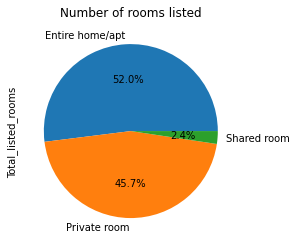

In [ ]:
room_type_df.plot.pie(y = 'Total_listed_rooms', autopct='%1.1f%%',labels= room_type_df['room_type'] ,legend = False,figsize=(4,4))
plt.title("Number of rooms listed")
plt.show()

In [ ]:
neighbourhood_group_df = pd.DataFrame(df['neighbourhood_group'].value_counts()).reset_index().rename(columns = {'index' : 'neighbourhood_group', 'neighbourhood_group':'Total_rooms_listed'})
neighbourhood_group_df

,neighbourhood_group,Total_rooms_listed
0,Manhattan,21660
1,Brooklyn,20095
2,Queens,5666
3,Bronx,1090
4,Staten Island,373


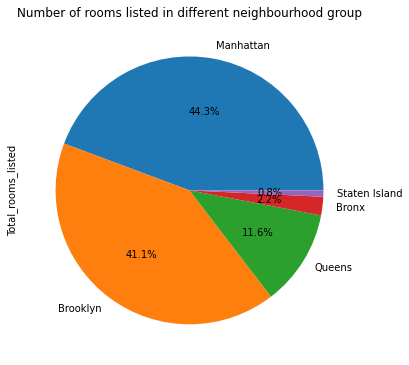

In [ ]:
neighbourhood_group_df.plot.pie(y = 'Total_rooms_listed', autopct='%1.1f%%',labels= neighbourhood_group_df['neighbourhood_group'] ,legend = False,figsize=(6,8))
plt.title("Number of rooms listed in different neighbourhood group")
plt.show()

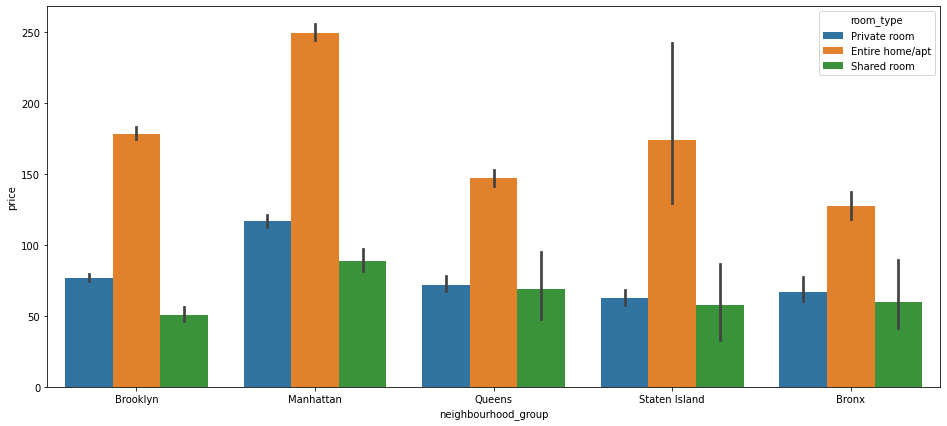

In [ ]:
plt.figure(figsize = (16,7))
sns.barplot(x = 'neighbourhood_group', y = 'price', data = df, hue='room_type')
plt.show()

Let's check the price distribution 

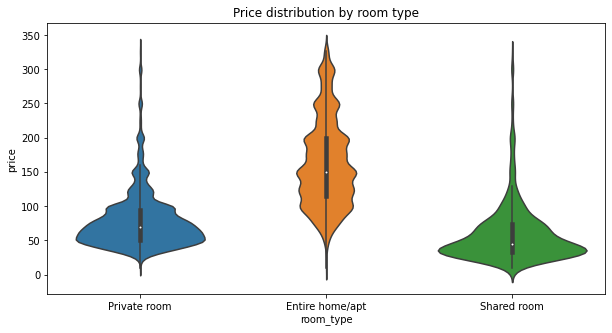

In [ ]:
plt.figure(figsize=(10,5))
vio_plt=sns.violinplot(data=df1, x='room_type', y='price')
vio_plt.set_title('Price distribution by room type')
plt.show()

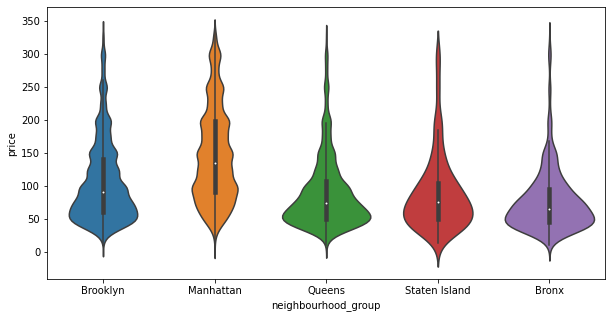

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x='neighbourhood_group',y='price',data=df1)
vio_plt.set_title('Price distribution in different neighbourhood_group')
plt.show()

In [ ]:
avg_price_rooms = pd.DataFrame(df1.groupby(['room_type'])['price'].mean())
avg_price_rooms

,price
room_type,
Entire home/apt,162.503731
Private room,79.043658
Shared room,59.397887


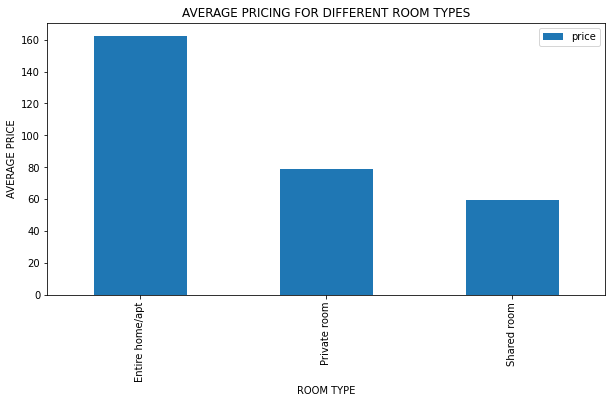

In [ ]:
pd.DataFrame(df1.groupby(['room_type'])['price'].mean()).plot.bar(figsize=(10,5))
plt.xlabel('ROOM TYPE')
plt.ylabel('AVERAGE PRICE')
plt.title('AVERAGE PRICING FOR DIFFERENT ROOM TYPES')
plt.show()

In [ ]:
pd.pivot_table(df[['room_type']],index=df['neighbourhood_group'],columns=df['room_type'],aggfunc='count')

room_type                         
room_type           Entire home/apt Private room Shared room
neighbourhood_group                                         
Bronx                           379          651          60
Brooklyn                       9558        10126         411
Manhattan                     13198         7982         480
Queens                         2096         3372         198
Staten Island                   176          188           9

Properties listing in different neighbourhood group

In [ ]:
top_host = pd.DataFrame(df['host_id'].value_counts()).reset_index().rename(columns = {"index":"host_id","host_id":"Total_rooms"}).head(10)
top_host

,host_id,Total_rooms
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,1475015,52


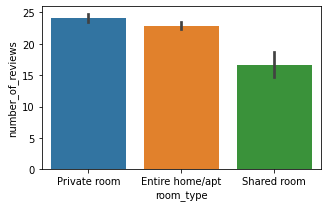

In [ ]:
plt.figure(figsize = (5,3))
sns.barplot(x = 'room_type', y = 'number_of_reviews', data = df)
plt.show()

In [ ]:
top_10_host = pd.DataFrame(df['host_id'].value_counts()).reset_index().rename(columns = {'index':"host_id", 'host_id':'Number of listed apt'}).head(10)
top_10_host

,host_id,Number of listed apt
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,1475015,52



# conclusion

Manhattan and Brooklyn are the prime neighbourhood group with highest number of rooms with premium properties.

Manhattan is the most expensive place while Queens and Statent island is cheap and less popular.

In Manhattan people perfer to rent entire home and apartment.

Most properties have price in the range $0-200

People prefer to list there properties for minimun number of nights less than a week or for a month. 

Expensive properties have less reviews, which means people less likely to rent expensive rooms and prefer cheaper properties to live. 